## ASSIGNMENT 3 Basic Analysis and data Visualization for Ramen(Food) ratings

In [36]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline

In [37]:
data = pd.read_csv('ramen-ratings.csv') #reading the data and save it into a variable
data.head(10) #show the first 10 rows of the data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [38]:
#checking total rows and column in our data
data.shape

(2580, 7)

Alright, we know that we got 7 columns in our data. Which are:
1. *Review* : unique numbers that inform the review order from the latest
2. *Brand*  : Ramen brand
3. *Variety*: variation of ramen
4. *Style*  : style of ramen
5. *Country*: Where the ramen is available
6. *Stars*  : Ramen ratings
7. *Top Ten*: ramen achievement

## Data Cleaning
 - check For missing data

In [39]:
data.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

We see that in the *Style* column we have 2 missing data. And *Top Ten* data tells us that if the ramen doesn't get 'Top Ten' achievement, then the data will be blank. Since we only have 2 missing data, we can drop it.

In [40]:
data = data.dropna(subset=['Style'])
print(data["Style"].isna().sum())

0


In [41]:
data['Stars'] = pd.to_numeric(data['Stars'], errors='coerce')
data = data.dropna(subset=['Stars'])

## Frequency
Let's see all styles in *Style* column

In [42]:
data['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

Ok, now we use *value_counts()* to count each unique Ramen Style.

In [43]:
data['Style'].value_counts()

Style
Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

Pack Style is the most used style. Now let's see all countries in *Country* column.

In [44]:
print(data["Country"].unique())
print(len(data["Country"].unique()), 'Countries')

['Japan' 'Taiwan' 'USA' 'India' 'South Korea' 'Singapore' 'Thailand'
 'Hong Kong' 'Vietnam' 'Ghana' 'Malaysia' 'Indonesia' 'China' 'Nigeria'
 'Germany' 'Hungary' 'Mexico' 'Fiji' 'Australia' 'Pakistan' 'Bangladesh'
 'Canada' 'Nepal' 'Brazil' 'UK' 'Myanmar' 'Netherlands' 'United States'
 'Cambodia' 'Finland' 'Sarawak' 'Philippines' 'Sweden' 'Colombia'
 'Estonia' 'Holland' 'Poland' 'Dubai']
38 Countries


And again, we use *value_counts()*

In [45]:
data['Country'].value_counts()

Country
Japan            352
USA              323
South Korea      307
Taiwan           223
Thailand         191
China            168
Malaysia         155
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: count, dtype: int64

Since Ramen is very popular in Japan, there is no doubt Japan will be the top one.

## The Top 10
Let's see all top 10 ramen for each year.

In [46]:
top10 = data.dropna()
top10

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9


In [47]:
top10 = top10[top10['Top Ten'] != '\n'] 
top10 = top10.sort_values('Top Ten' ) 
top10

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5.00,2012 #1
1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5.00,2012 #10
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.00,2012 #2
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5.00,2012 #3
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.00,2012 #4
2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.50,2012 #5
2189,391,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.25,2012 #6
2002,578,Nongshim,Shin Ramyun Black,Pack,South Korea,4.75,2012 #7
2295,285,Doll,Artificial Chicken,Pack,Hong Kong,4.50,2012 #9
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.00,2013 #1


## Top 10 Ramen Brand by total products
Top 10 Ramen brands that have the most products.

In [48]:
data['Brand'].value_counts()[:10]

Brand
Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     51
Ottogi            45
Vina Acecook      34
Name: count, dtype: int64

## Top 50 Ramen Ratings by brands
Calculating the average rating for each brand, and then we'll show who is in top 50.

In [49]:
#Total number of ramen brands
print(len(data['Brand'].unique()))

355


Let's see if *Stars* column has invalid value.

In [67]:
for s in data['Stars']:
    try:
        s = float(s)
    except:
        print(s)

Okay, we found anomalies in our data. Some ramen don't have ratings. We can drop it from our data.

In [51]:
data = data[data['Stars'] != 'Unrated']
print(data[data['Stars'] == 'Unrated']['Stars'].sum()) 

0.0


In [52]:
brands = list(data['Brand'].unique())
counter = [0.0]*355

brands_cnt = dict(zip(brands, counter)) #create dictionary to count all ratings and then save the averages

for brand in brands:
    brands_data = data[data['Brand'] == brand]
    for star in brands_data['Stars']:
        brands_cnt[brand] += float(star) #count all ratings
    brands_cnt[brand] /= len(brands_data) #average

In [53]:
top50ratings = [] #list for saving the brand name and its average rating
for key, values in brands_cnt.items():
    top50ratings.append([key,values])

#print the top 50 ramen ratings by brand
top50ratings = sorted(top50ratings, key = lambda x : x[1], reverse = True) #sorting values in descending order
top50ratings
for i in range(50):
    print('#{:<3}{:25} {}'.format(i+1, top50ratings[i][0], round(top50ratings[i][1],2)))

#1  Tao Kae Noi               5.0
#2  Jackpot Teriyaki          5.0
#3  Prima                     5.0
#4  Takamori                  5.0
#5  The Ramen Rater Select    5.0
#6  Kiki Noodle               5.0
#7  Daifuku                   5.0
#8  Patanjali                 5.0
#9  Nyor Nyar                 5.0
#10 ORee Garden               5.0
#11 Prima Taste               5.0
#12 MyOri                     5.0
#13 Seven & I                 5.0
#14 Torishi                   5.0
#15 ChoripDong                5.0
#16 The Bridge                5.0
#17 Plats Du Chef             5.0
#18 Kimura                    5.0
#19 Peyang                    5.0
#20 Komforte Chockolates      5.0
#21 Daddy                     5.0
#22 Song Hak                  5.0
#23 Foodmon                   5.0
#24 Higashi                   5.0
#25 MyKuali                   4.95
#26 CarJEN                    4.93
#27 TTL                       4.92
#28 Nanyang Chef              4.88
#29 Mom's Dry Noodle          4.83
#30 Tseng

_________________________

## Data Visualisation
Used Various data Visualization techniques
#### Count PLot

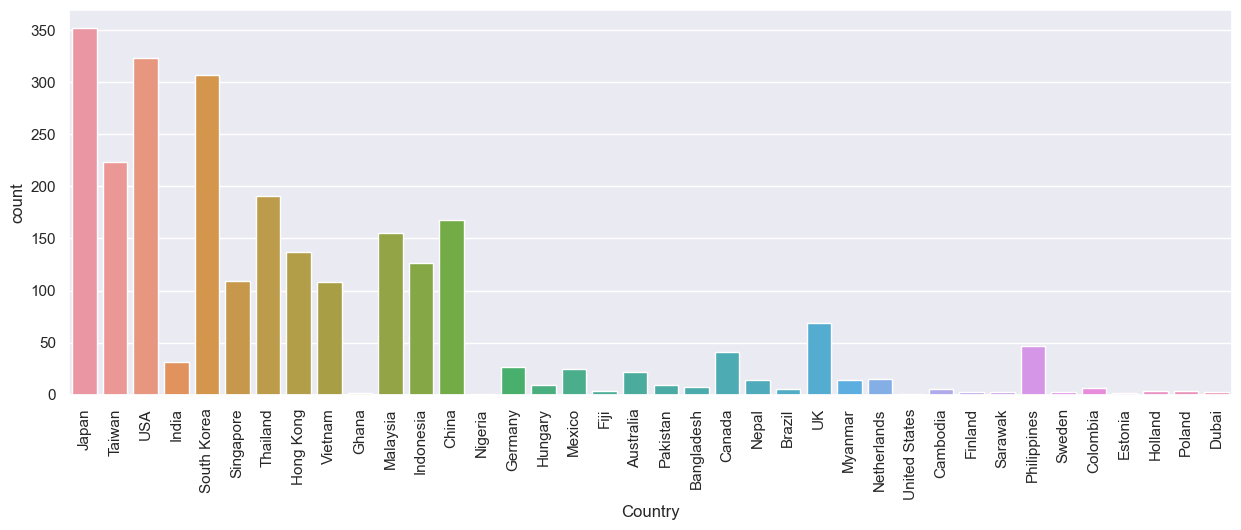

In [54]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1,figsize = (15,5))
sns.countplot(x = 'Country', data = data)
plt.xticks(rotation=90)

plt.show()

#### Pie Plot
If you want to plot something about percentage, then Pie Plot is a right choice. let's find out the percentage of total ramen based on style first.

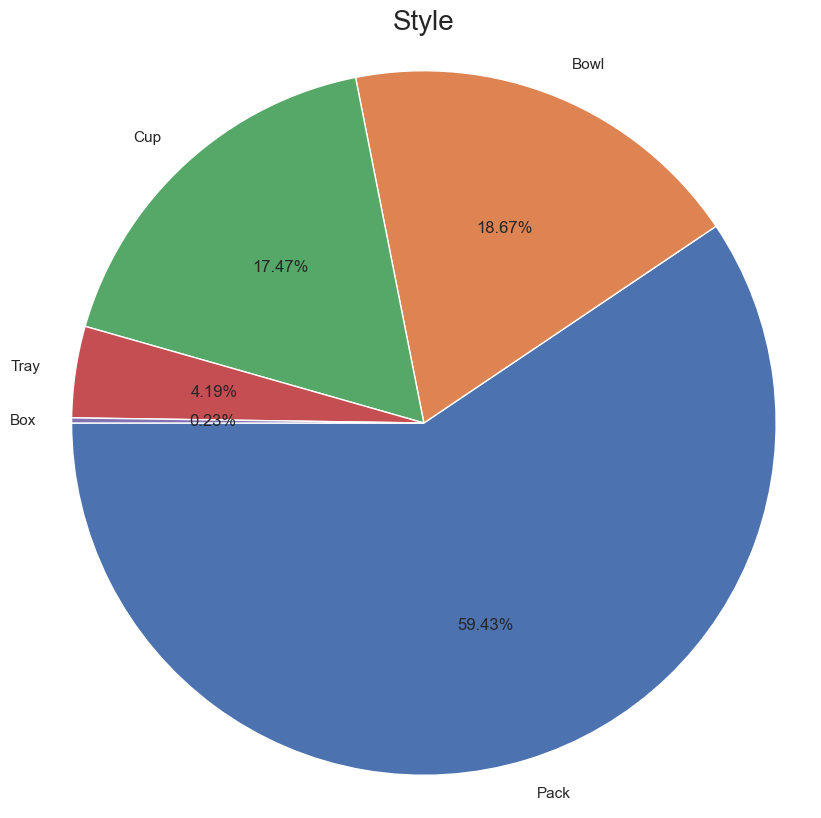

In [55]:
labels = 'Pack', 'Bowl', 'Cup' , 'Tray', 'Box' #We can't include 'Bar' and 'Can' because they only appear once in our data.
size = [1531, 481, 450, 108, 6]

f, ax = plt.subplots(1,1, figsize= (10,10))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.axis('equal')
ax.set_title("Style", size = 20)

plt.show()

___________________

C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


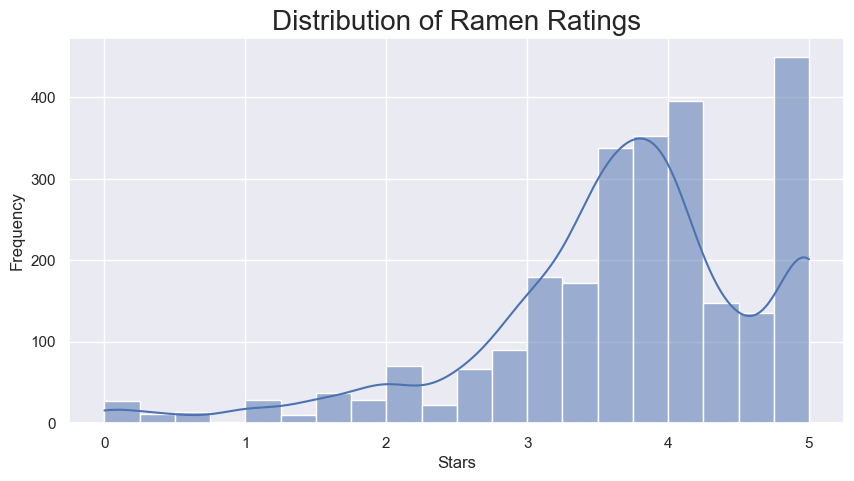

In [56]:
# Distribution of ramen ratings
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data['Stars'].astype(float), bins=20, kde=True)
ax.set_title('Distribution of Ramen Ratings', size=20)
ax.set_xlabel('Stars')
ax.set_ylabel('Frequency')
plt.show()


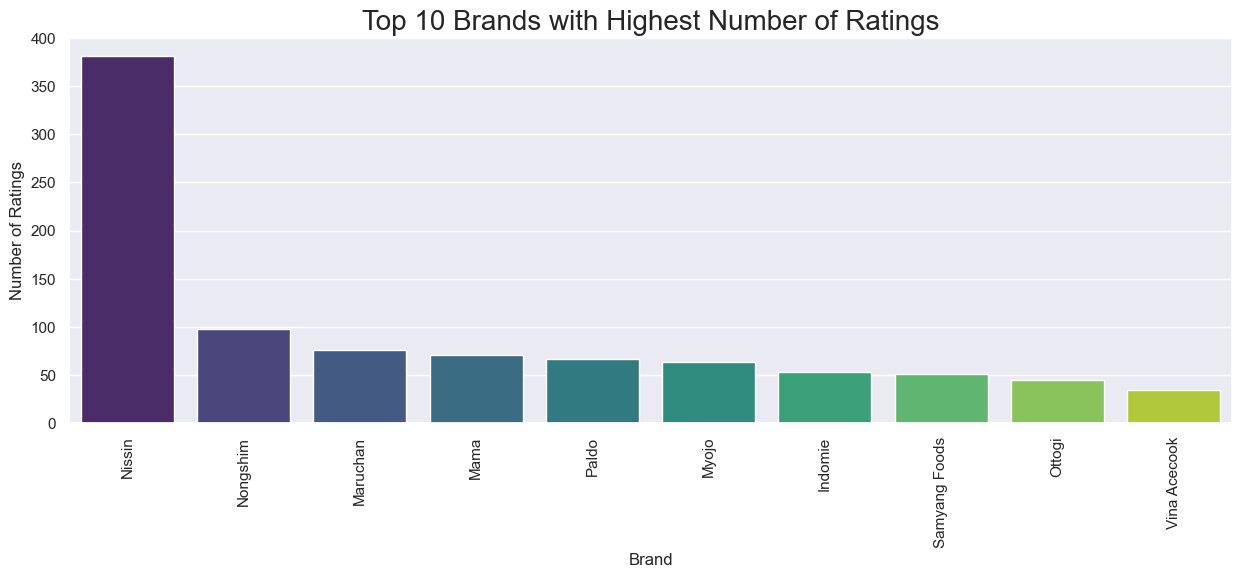

In [57]:
# Top 10 brands with the highest number of ratings
top10_brands = data['Brand'].value_counts().nlargest(10)
f, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x=top10_brands.index, y=top10_brands.values, palette='viridis')
ax.set_title('Top 10 Brands with Highest Number of Ratings', size=20)
ax.set_xlabel('Brand')
ax.set_ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


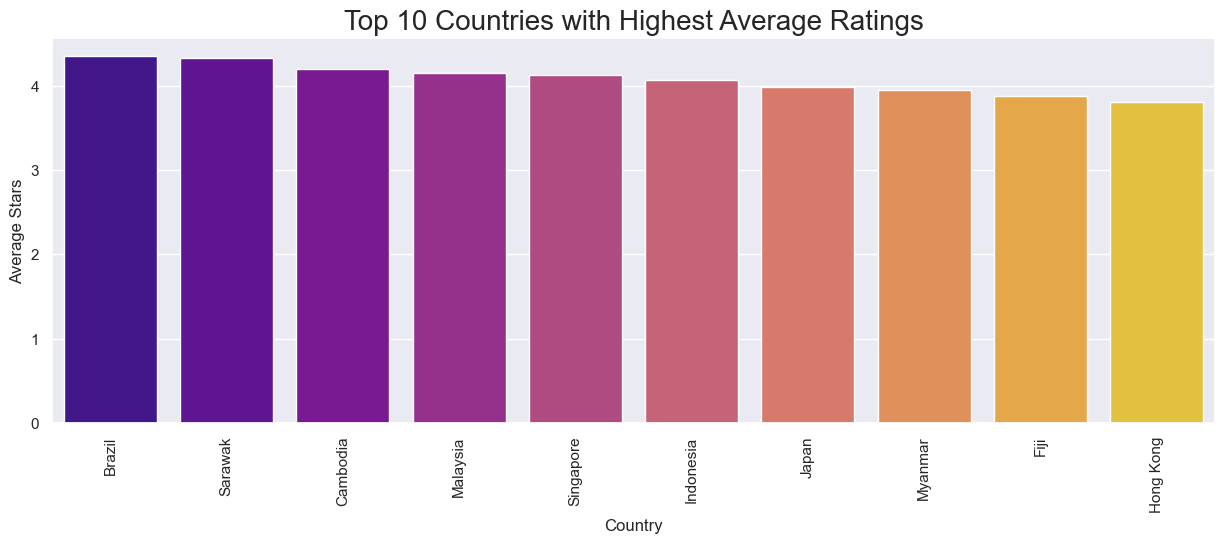

In [58]:
# Top 10 countries with the highest average ratings
avg_ratings_country = data.groupby('Country')['Stars'].mean().sort_values(ascending=False)
top10_countries = avg_ratings_country.nlargest(10)
f, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x=top10_countries.index, y=top10_countries.values, palette='plasma')
ax.set_title('Top 10 Countries with Highest Average Ratings', size=20)
ax.set_xlabel('Country')
ax.set_ylabel('Average Stars')
plt.xticks(rotation=90)
plt.show()


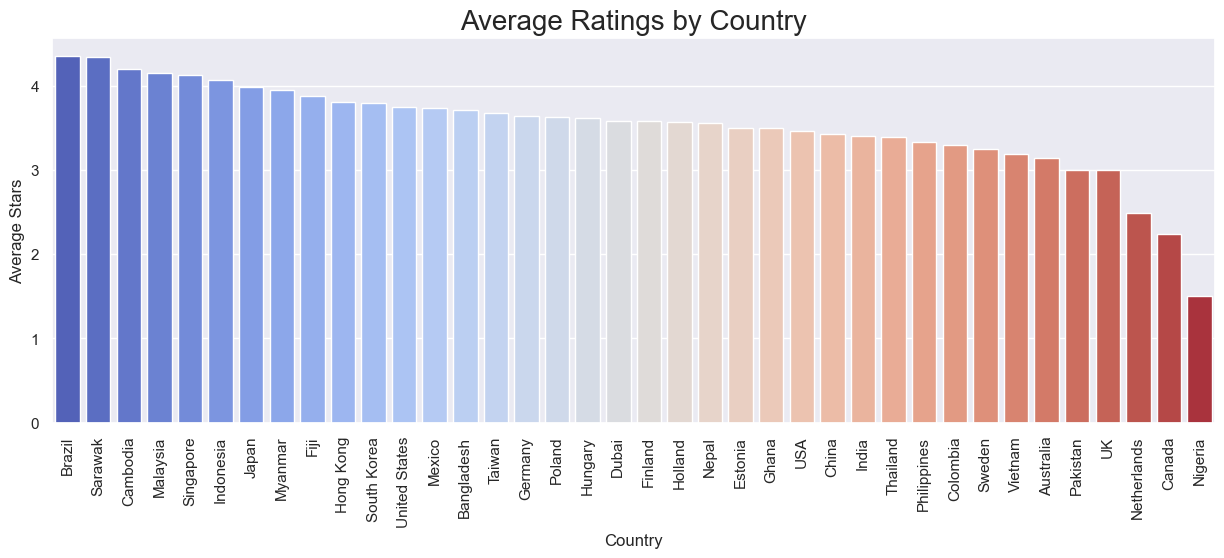

In [59]:
#Average rating by country 
f, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x=avg_ratings_country.index, y=avg_ratings_country.values, palette='coolwarm')
ax.set_title('Average Ratings by Country', size=20)
ax.set_xlabel('Country')
ax.set_ylabel('Average Stars')
plt.xticks(rotation=90)
plt.show()

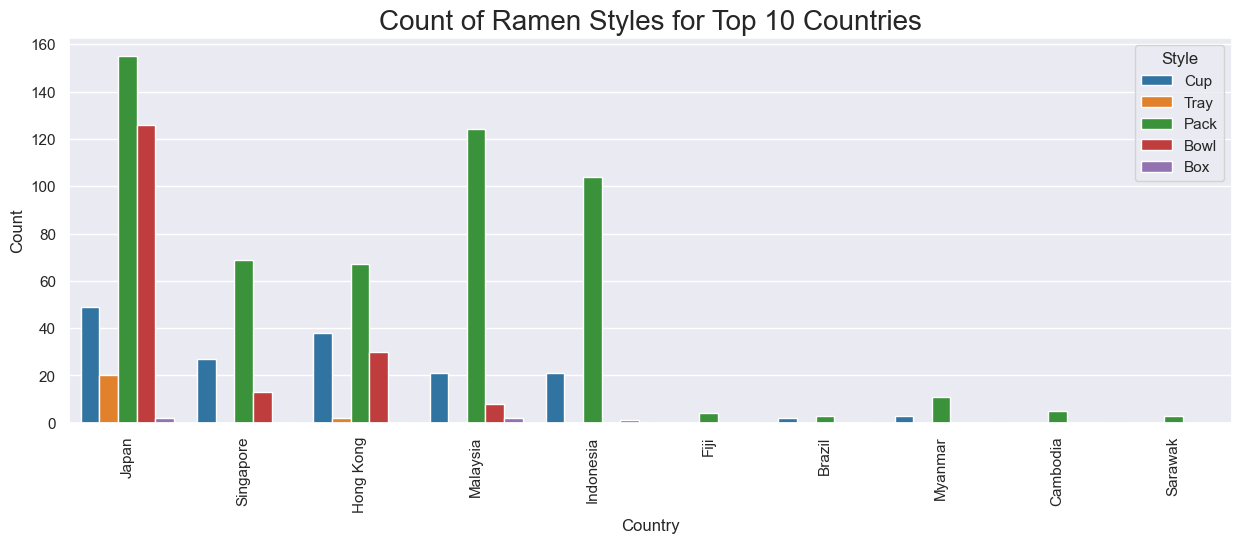

In [60]:
# Count of ramen styles for the top 10 countries
top10_country_styles = data[data['Country'].isin(top10_countries.index)]
f, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(x='Country', hue='Style', data=top10_country_styles, palette='tab10')
ax.set_title('Count of Ramen Styles for Top 10 Countries', size=20)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Swarmplot of ramen ratings for top 10 countries
. Adds a swarmplot to visualize the distribution of ratings for the top 10 varieties.

C:\Users\91914\AppData\Local\Temp\ipykernel_11136\2890107789.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Country', y='Stars', data=top10_country_styles, palette='tab10')
C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91914\an\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91914\an\Lib\site-packages\seabor

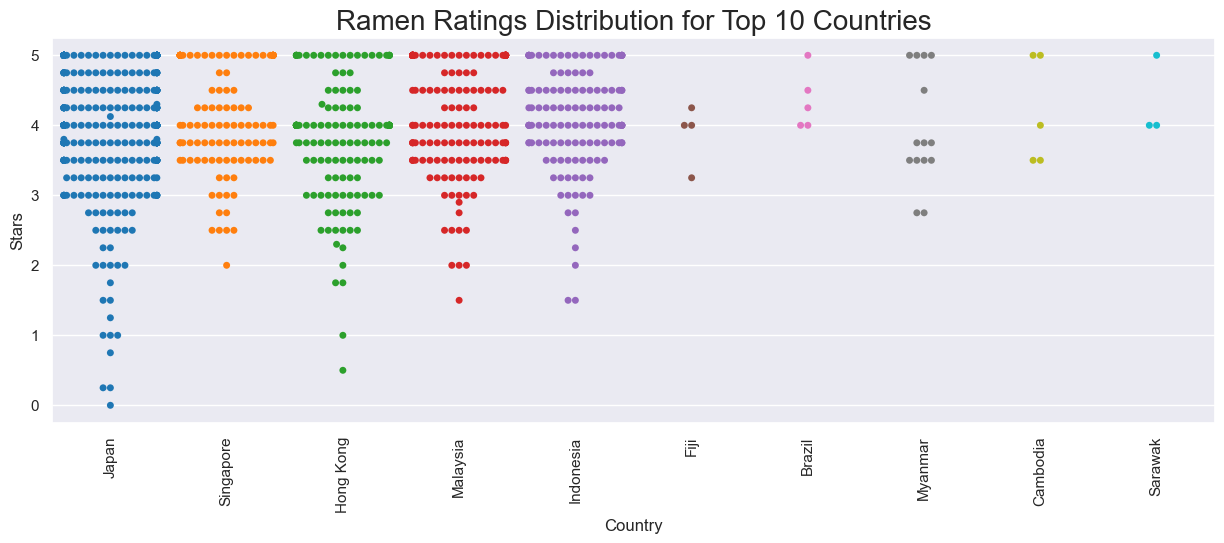

In [61]:
f, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.swarmplot(x='Country', y='Stars', data=top10_country_styles, palette='tab10')
ax.set_title('Ramen Ratings Distribution for Top 10 Countries', size=20)
ax.set_xlabel('Country')
ax.set_ylabel('Stars')
plt.xticks(rotation=90)
plt.show()

# Top 15 ramen varieties by count
. Identifies and plots the top 15 ramen varieties based on the count of ratings.

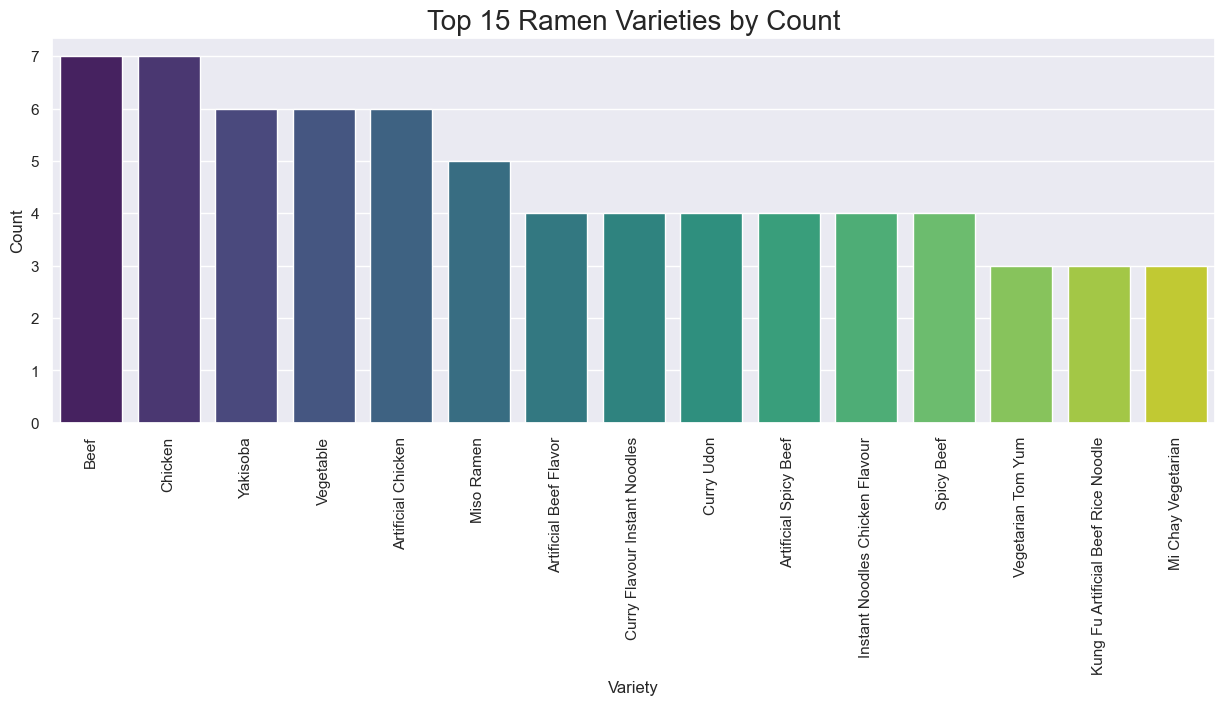

In [62]:
top10_varieties = data['Variety'].value_counts().nlargest(15)
f, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x=top10_varieties.index, y=top10_varieties.values, palette='viridis')
ax.set_title('Top 15 Ramen Varieties by Count', size=20)
ax.set_xlabel('Variety')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Heatmap of average ratings by country and style
. Creates a pivot table with the average ratings for each country and style combination.
. Uses a heatmap to visualize these average ratings, making it easy to spot trends.

C:\Users\91914\an\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


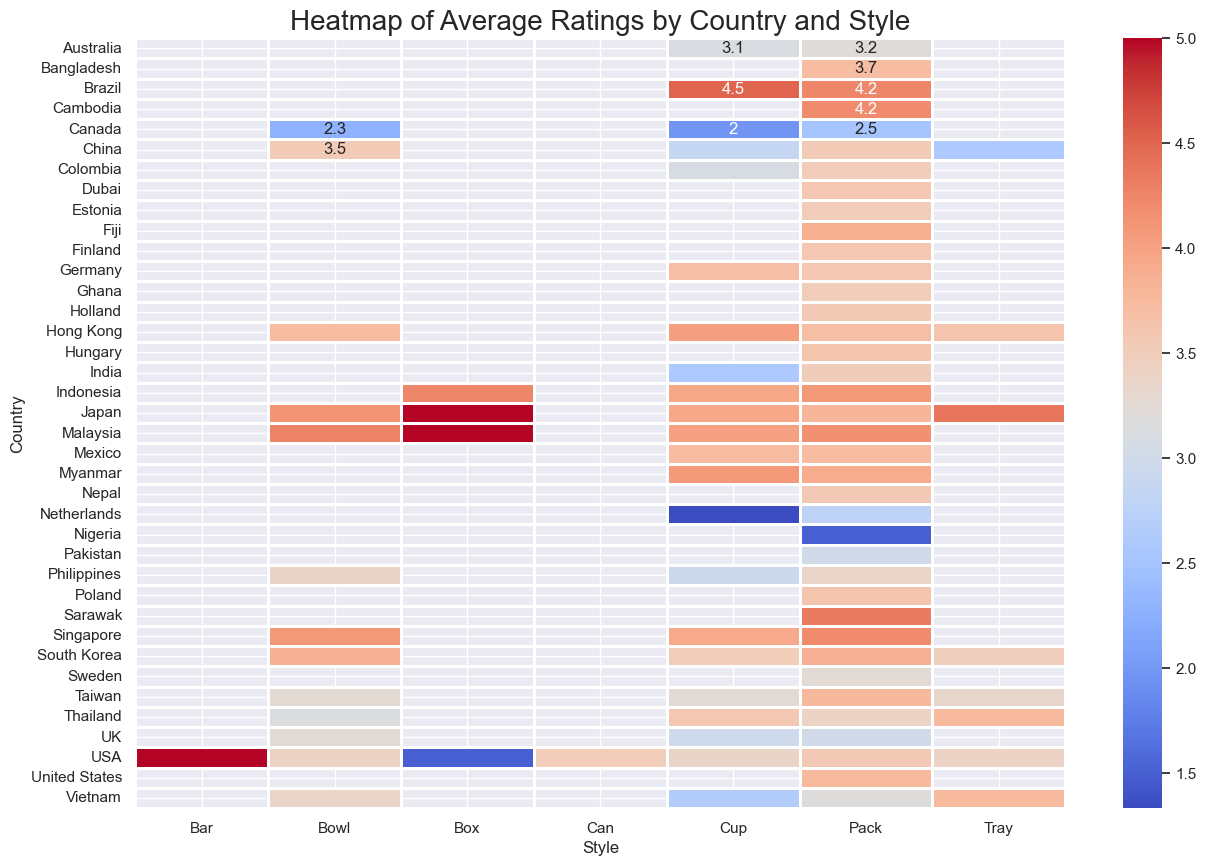

In [63]:
pivot_table = data.pivot_table(values='Stars', index='Country', columns='Style', aggfunc='mean')
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.title('Heatmap of Average Ratings by Country and Style', size=20)
plt.xlabel('Style')
plt.ylabel('Country')
plt.show()

## Facet Grid of Ramen Ratings Distribution by Style
. Creates a FacetGrid to plot the distribution of ratings for each ramen style.
. Each subplot shows the distribution of ratings for one style, using histograms and KDE plots.

C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91914\an\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

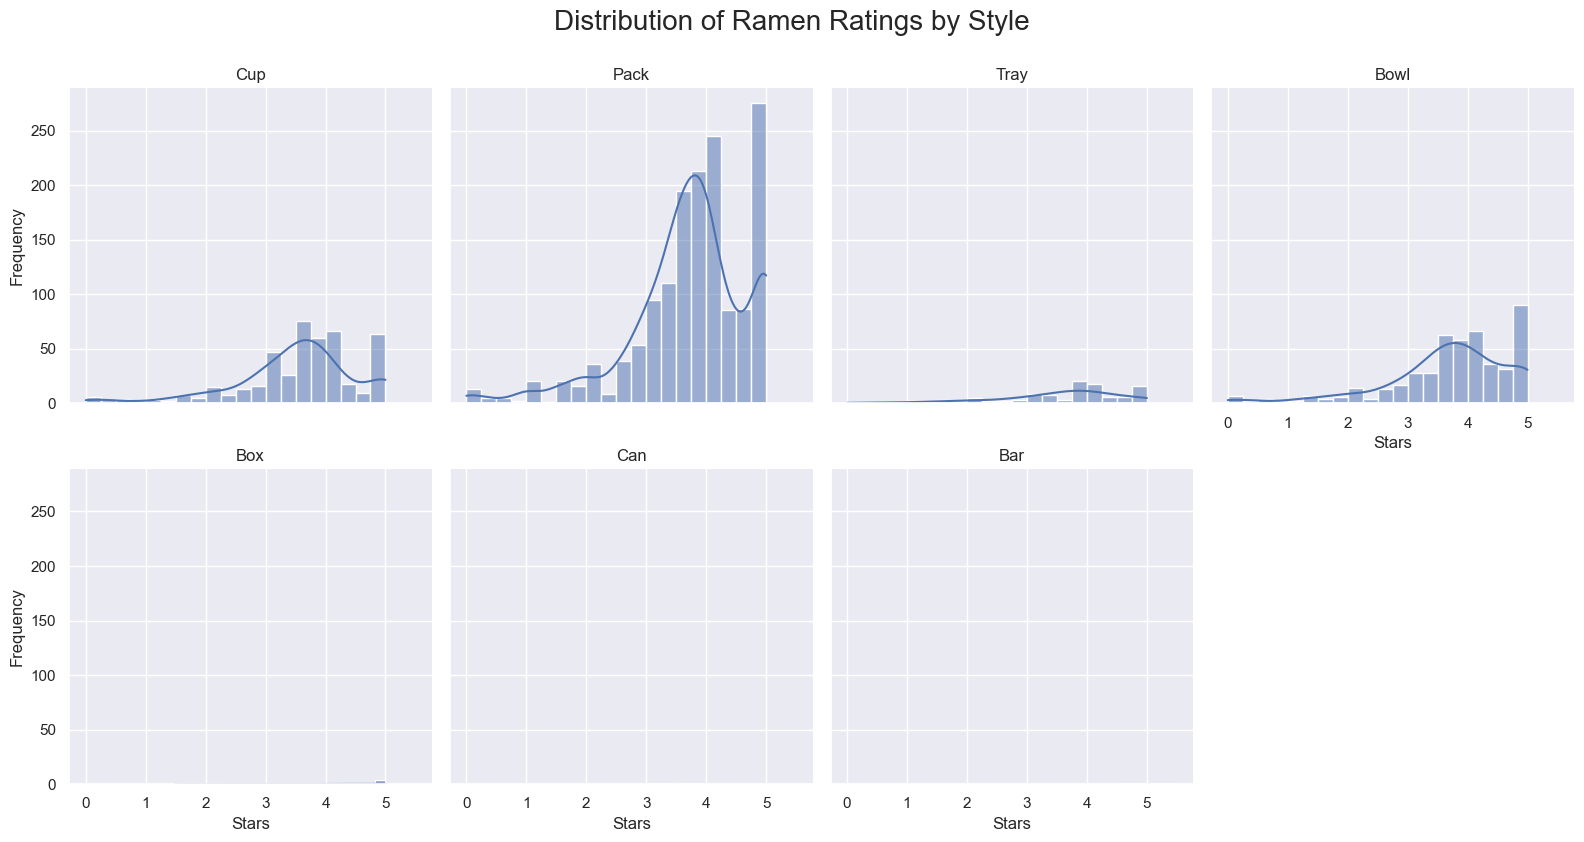

In [64]:
g = sns.FacetGrid(data, col='Style', col_wrap=4, height=4)
g.map(sns.histplot, 'Stars', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Stars', 'Frequency')
plt.suptitle('Distribution of Ramen Ratings by Style', size=20, y=1.05)
plt.show()

# Correlation Heatmap for Ratings, Brand, and Variety
# Create a new data frame with numerical encoding for 'Brand' and 'Variety'
. Converts the categorical columns 'Brand' and 'Variety' into numerical codes.

. Computes the correlation matrix for ratings, brand, and variety.

. Uses a heatmap to visualize these correlations, which can help identify any interesting relationships.

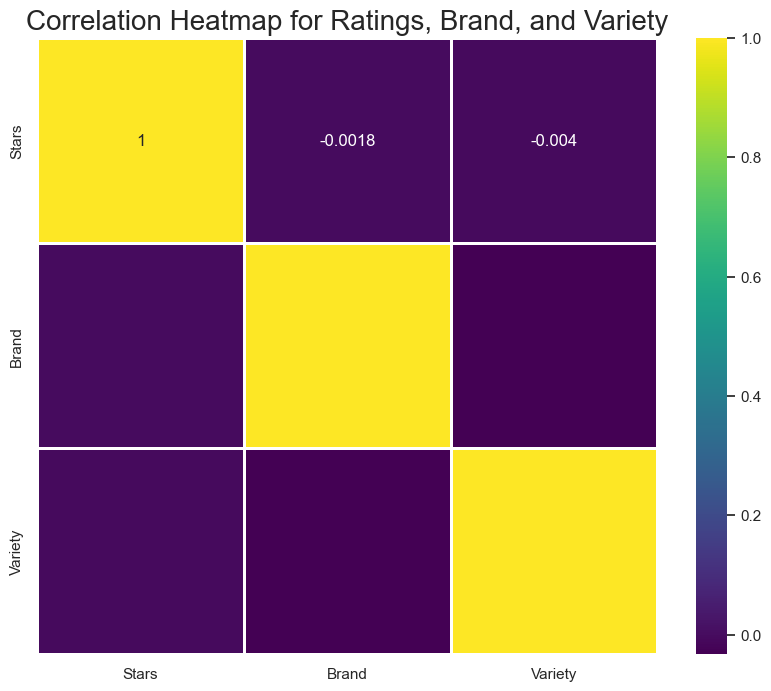

In [65]:
encoded_data = data.copy()
encoded_data['Brand'] = encoded_data['Brand'].astype('category').cat.codes
encoded_data['Variety'] = encoded_data['Variety'].astype('category').cat.codes

correlation_matrix = encoded_data[['Stars', 'Brand', 'Variety']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linecolor='white', linewidths=1)
plt.title('Correlation Heatmap for Ratings, Brand, and Variety', size=20)
plt.show()

# The lmplot is used to create a scatter plot of Brand_Code vs. Variety_Code
# The regplot shows the relationship between Year and Stars, including a linear regression line.

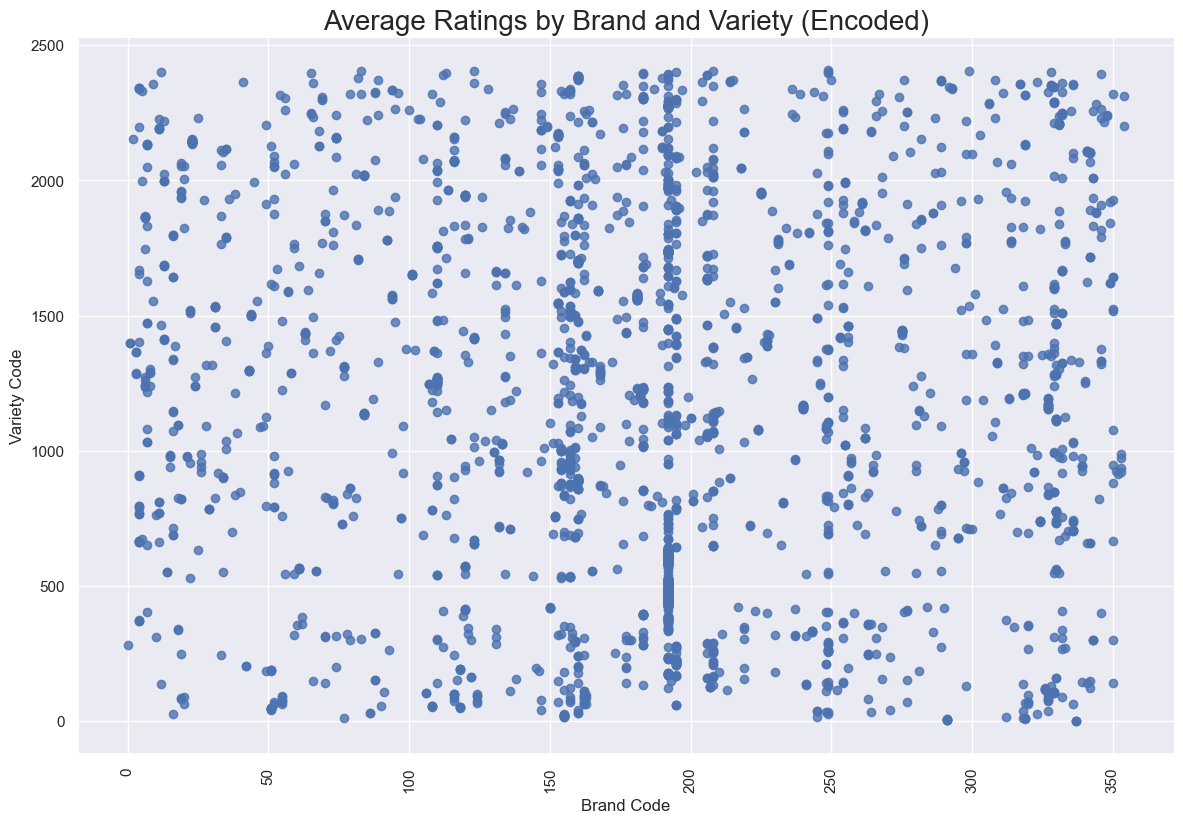

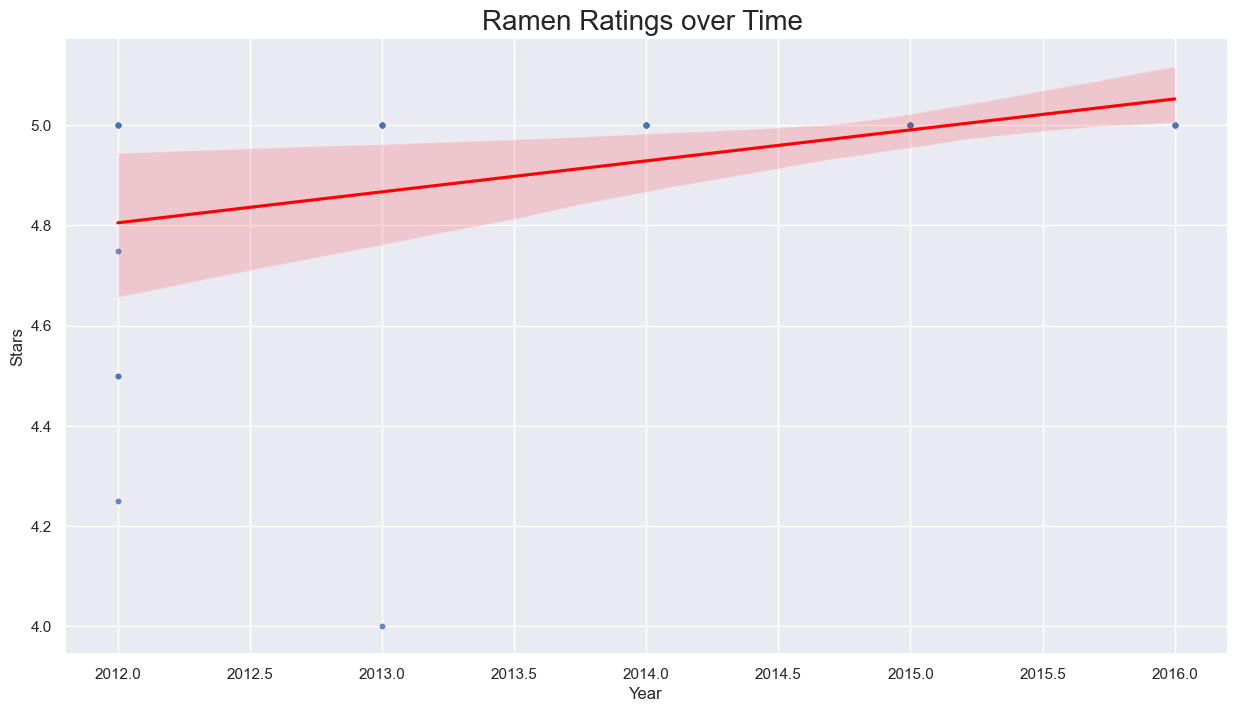

In [66]:
%matplotlib inline

# Reading the data
data = pd.read_csv('ramen-ratings.csv')

# Dropping rows where 'Style' is NaN
data = data.dropna(subset=['Style'])

# Converting 'Stars' to numeric and dropping non-numeric entries
data['Stars'] = pd.to_numeric(data['Stars'], errors='coerce')
data = data.dropna(subset=['Stars'])

# Adding a Year column from Top Ten if possible
data['Year'] = data['Top Ten'].str.extract(r'(\d{4})').astype(float)

# Encode 'Brand' and 'Variety' as numerical values
data['Brand_Code'] = data['Brand'].astype('category').cat.codes
data['Variety_Code'] = data['Variety'].astype('category').cat.codes

# Average ratings by Brand and Variety
avg_ratings_brand_variety = data.groupby(['Brand_Code', 'Variety_Code'])['Stars'].mean().reset_index()

# lmplot of average ratings by Brand vs. Variety
sns.lmplot(x='Brand_Code', y='Variety_Code', data=avg_ratings_brand_variety, fit_reg=False, height=8, aspect=1.5)
plt.title('Average Ratings by Brand and Variety (Encoded)', size=20)
plt.xlabel('Brand Code')
plt.ylabel('Variety Code')
plt.xticks(rotation=90)
plt.show()

# regplot of ratings over time
if 'Year' in data.columns:
    plt.figure(figsize=(15, 8))
    sns.regplot(x='Year', y='Stars', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title('Ramen Ratings over Time ', size=20)
    plt.xlabel('Year')
    plt.ylabel('Stars')
    plt.show()
else:
    print("The dataset does not contain a 'Year' column to plot ratings over time.")